# Cryptocurrency Liquidity Prediction for Market Stability

**Life cycle of Machine learning Project**

`Part-1` the file contains below key information

* Understanding the Problem Statement
* Data Collection
* Data Preprocessing / Cleaning
* Feature Engineering
* Exploratory data analysis (EDA)

## 1) Understanding the Problem Statement

**Problem Statement :**

* This project is about predicting how easily a cryptocurrency can be bought or sold — this is called **liquidity**.
* If a coin is high in liquidity, you can sell it quickly without its price changing much.
* If it has low liquidity, it’s hard to sell, and even small trades can make the price jump or drop a lot. That makes the market risky.

**Problem Description :**

-   **liquidity**

    * **High liquidity** = Easy to buy/sell, and price stays stable.
    * **Low liquidity** = Hard to trade, and price can jump or crash quickly.
                        If liquidity is too low, the market becomes unstable and risky.

-   **project goal**

    * To build a machine learning model that can:
        * Predict the liquidity level (High / Medium / Low) of cryptocurrencies.
        * Use information like `trading volume`, `transaction patterns` (price changes), `exchange listings`, and `social media activity`.
        
-   **What is the importance of goal ??**

    * The prediction of low liquidity early will help avoid risky situations.
    * Traders and exchanges can prepare ahead and reduce losses.
    * It helps keep the market more stable.
    
-   **Objective :**
    * model that forecasts liquidity levels, so that traders, investors, and exchanges can make smarter, safer decisions in the crypto market.

## 2) Data Collection
- The dataset is downloaded from https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM

## 3) Data Preprocessing

**Importing the required libraries**

In [1]:
# pip install pandas numpy matplotlib datetime seaborn

In [2]:
import pandas as pd                       # for Data mannupulation
import numpy as np                        # numerical python libraries, for scientifical calculation of the data
import matplotlib.pyplot as plt           # data visualtion library
import datetime as dt                     # Time series data library
import seaborn as sns                     # data visualtion library

import warnings                           # some library have some warning messages, 
warnings.filterwarnings("ignore")         # if we ignore it thoese warning message will not show in the notebook. the notebook looks better

**Import the CSV Data as Pandas DataFrame**
- Here we have the data for two different dates (16th and 17th), which will gives the opportunity to do time-based analysis and build a more reliable model.

In [3]:
df_16 = pd.read_csv('coin_gecko_2022-03-16.csv')
df_17 = pd.read_csv('coin_gecko_2022-03-17.csv')

**Merge the Two Datasets**

In [4]:
df = pd.concat([df_16, df_17], ignore_index=True)

In [5]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709910e+11,16-03-2022
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271040e+11,16-03-2022
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,16-03-2022
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,16-03-2022
4,USD Coin,USDC,0.999874,-0.001,0.000,0.000,3.872274e+09,5.222214e+10,16-03-2022
...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


**Show Top 5 Records**

In [6]:
df.head() # first 5 rows of the data

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709910e+11,16-03-2022
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271040e+11,16-03-2022
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,16-03-2022
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,16-03-2022
4,USD Coin,USDC,0.999874,-0.001,0.000,0.000,3.872274e+09,5.222214e+10,16-03-2022


**Show bottom 5 Records**

In [7]:
df.tail() # first 5 rows of the data

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2976839.00,68090240.0,2022-03-17
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,366787.00,67826274.0,2022-03-17
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,13633759.00,67762845.0,2022-03-17
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9398219.00,67388220.0,2022-03-17
999,Verus Coin,VRSC,0.999387,0.053,0.061,-0.122,20275.07,67318962.0,2022-03-17


**Shape of the dataset**

In [8]:
df.shape # (rows, columns) of the data

(1000, 9)

**Checking the datatype of each column**

In [9]:
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

**Summary of the dataset**

**Display summary statistics for a dataframe**

* `count`              : The total count value of the column / how many time the column present the values
* `mean`               : The average value of the column
* `std`                : The standard_deviation of the column
* `min`                : The minimum value in the column
* `25% (Q1)`           : 25 percentaile of the column  (range of 0 to 25)
* `50% (Q2) / median`  : The median value of the column / also it is known as 50th percentaile of the column / the central value of the column (range of 0 to 50)
* `75% (Q3)`           : The 75th percentaile of the column (range of 0 to 75)
* `max (Q4)`           : The maximum Value of the column (range of 0 to 100)

In [10]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755303e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803781e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


**Check Datatypes in the dataset**

In [11]:
df.info()   # Check Null and Dtypes

# This will detect the data_type of each column along with it's Non-null count value, which help to easy detect the null values present in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


## Data Cleaning

**Let's convert the datetime column to pandas datetime format**

In [12]:
# the date column is in object type, which should be in datetime format, and there are no consistent datetime format in date column.
# so we need to convert it into pd.to_datetime() format with dayfirst=True.

df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True, errors='coerce')

# format='%Y-%M-%D' this is simply says that the 'date' column format is formatting in to year(%y)-month(%m)-date(%d) wise.
# the date column datatype also converted in to datetime format.

In [13]:
df['date']

0     2022-03-16
1     2022-03-16
2     2022-03-16
3     2022-03-16
4     2022-03-16
         ...    
995   2022-03-17
996   2022-03-17
997   2022-03-17
998   2022-03-17
999   2022-03-17
Name: date, Length: 1000, dtype: datetime64[ns]

**Imputation of Null values present in the dataset**

In [14]:
df.isnull().sum()

# # here some of the columns count are with 1000, some are not, which means some of the columns have null values present in it.

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [15]:
# so we need to impute the null values using the mean of the column, because the data is continuous numerical data

df['1h'].fillna(df['1h'].median(), inplace=True)
df['24h'].fillna(df['24h'].median(), inplace=True)
df['7d'].fillna(df['7d'].median(), inplace=True)
df['24h_volume'].fillna(df['24h_volume'].median(), inplace=True)

In [16]:
df.isnull().sum() # after imputation check there are no null values in the data

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

In [17]:
df.dtypes 
# the datatypes are correct way only, 2 catagorical column, 
                                    # 6 numerical columns along with 
                                    # single datetime64 column are present in the dataset.

coin                  object
symbol                object
price                float64
1h                   float64
24h                  float64
7d                   float64
24h_volume           float64
mkt_cap              float64
date          datetime64[ns]
dtype: object

In [18]:
df.duplicated().sum() # check for duplicate values in the data
# no duplicate entries are present in the dataset

np.int64(0)

### Outlier Detection & Handling
Statistical outlier Detection using Interquartile Range Method

In [19]:
# IQR = Q3 - Q1
# Outliers: values < Q1 - 1.5IQR or > Q3 + 1.5IQR

Q1 = df['price'].quantile(0.25)                 # Q1 is the 25th percentile, meaning 25% of the data lies below this value.
Q3 = df['price'].quantile(0.75)                 # Q3 is the 75th percentile, meaning 75% of the data lies below this value.
IQR = Q3 - Q1                                   # IQR = Q3 - Q1 helps identify the typical range of values and detect outliers outside this range.

lower_fense = Q1 - 1.5 * IQR                    # Any value below this boundry is considered a lower outlier.
upper_fense = Q3 + 1.5 * IQR                    # Any value above this boundry is considered an upper outlier.

outliers = (df['price'] < lower_fense) | (df['price'] > upper_fense)  # this will return a boolean series, where True indicates an outlier and 
                                                                      # False indicates a non-outlier.
filtered_outliers = df[outliers]                # frame it in to a dataframe, which contains only the outliers.
filtered_outliers

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.46,0.022,0.030,0.055,3.539076e+10,7.709910e+11,2022-03-16
1,Ethereum,ETH,2744.41,0.024,0.034,0.065,1.974870e+10,3.271040e+11,2022-03-16
3,BNB,BNB,383.43,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
6,Terra,LUNA,89.51,0.024,-0.005,0.046,2.661508e+09,3.294596e+10,2022-03-16
7,Solana,SOL,85.61,0.024,0.014,0.041,1.776167e+09,2.753589e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
960,Enzyme,MLN,54.27,0.005,0.006,0.033,5.114354e+06,7.889748e+07,2022-03-17
967,DeFi Pulse Index,DPI,158.57,-0.005,0.024,0.012,2.646480e+05,7.459007e+07,2022-03-17
978,Index Coop - ETH 2x Flexible Leverage Index,ETH2X-FLI,69.79,0.002,0.056,0.063,1.140003e+06,7.208362e+07,2022-03-17
983,Wrapped NXM,WNXM,26.39,0.003,-0.010,-0.030,1.579870e+06,7.059349e+07,2022-03-17


Outlier Detection using boxplot visualisation

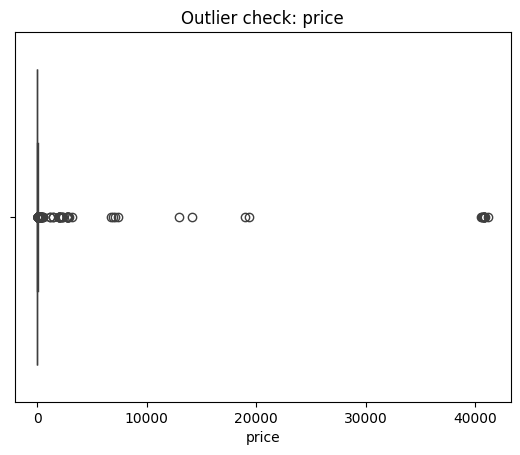

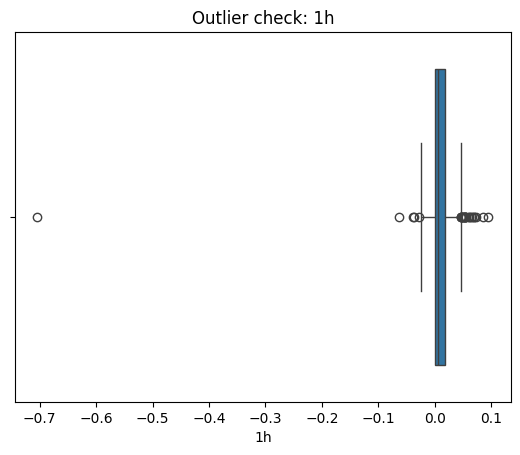

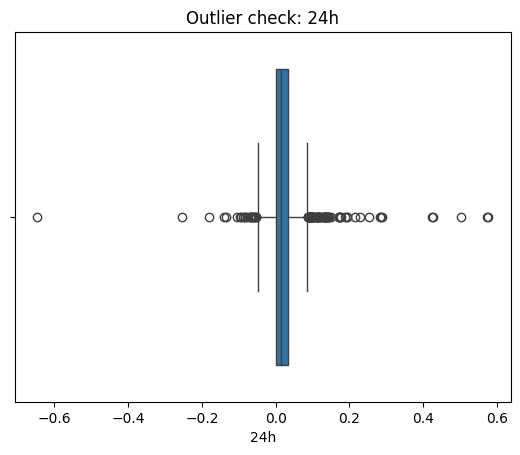

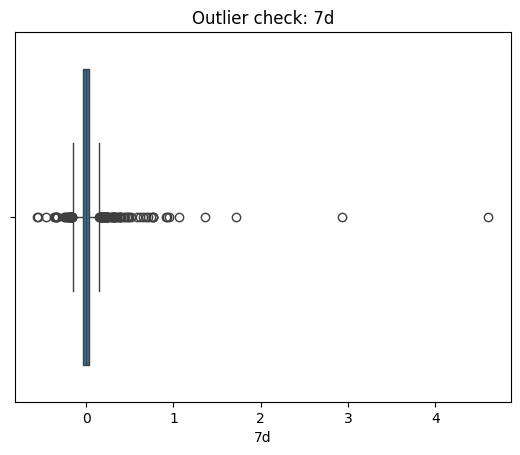

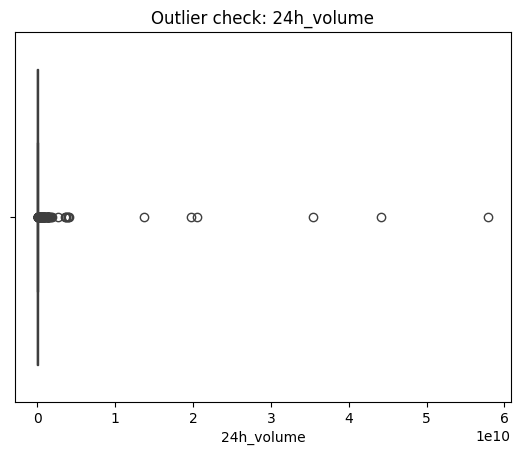

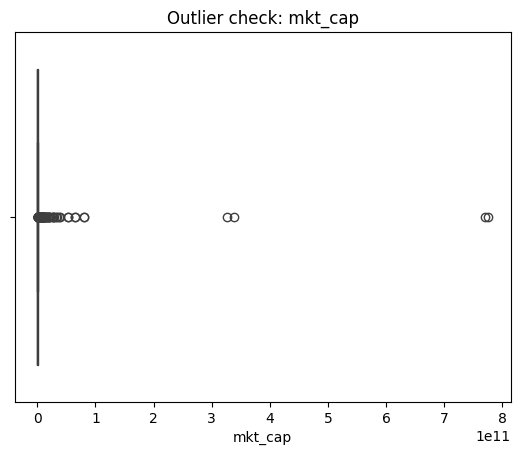

In [20]:
num_col = df.select_dtypes(exclude = ['object', 'datetime64'])  # select all the numerical columns in the data

for i in num_col:
    sns.boxplot(x=df[i])
    plt.title(f'Outlier check: {i}')
    plt.show()

In [21]:
# interpretation of the boxplot:

In [22]:
df.head(10) # checking the top 10 rows

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709910e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271040e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,0.000,3.872274e+09,5.222214e+10,2022-03-16
5,XRP,XRP,0.785018,0.019,0.019,0.089,3.925205e+09,3.753079e+10,2022-03-16
6,Terra,LUNA,89.510000,0.024,-0.005,0.046,2.661508e+09,3.294596e+10,2022-03-16
7,Solana,SOL,85.610000,0.024,0.014,0.041,1.776167e+09,2.753589e+10,2022-03-16
8,Cardano,ADA,0.824161,0.016,0.016,0.028,9.507183e+08,2.633189e+10,2022-03-16
9,Polkadot,DOT,18.550000,0.031,0.035,0.095,7.621989e+08,2.017527e+10,2022-03-16


**Categorical_features's value_count Summery**

In [23]:
cat_feature = df.select_dtypes(include=['object'])
cat_feature

,coin,symbol
0,Bitcoin,BTC
1,Ethereum,ETH
2,Tether,USDT
3,BNB,BNB
4,USD Coin,USDC
...,...,...
995,IRISnet,IRIS
996,Circuits of Value,COVAL
997,ARPA Chain,ARPA
998,SuperRare,RARE


In [24]:
cat_feature.nunique()  # there are total 506 - number of unique coin and 
                       # 503 - number of unique symbol in the categorical column

coin      506
symbol    503
dtype: int64

In [25]:
# checking the unique value_counts of each categorical column
for col in cat_feature.columns:
    print(f"Value counts for column: {col}")
    print(cat_feature[col].value_counts())
    print("-" * 40)

Value counts for column: coin
coin
Oxygen                2
Bitcoin               2
Ethereum              2
Tether                2
Aave [OLD]            2
                     ..
Blox                  1
MAPS                  1
Netvrk                1
Loom Network (OLD)    1
Verus Coin            1
Name: count, Length: 506, dtype: int64
----------------------------------------
Value counts for column: symbol
symbol
RUNE       4
TIME       4
FEG        4
EROWAN     2
DOCK       2
          ..
CDT        1
MAPS       1
NTVRK      1
LOOMOLD    1
VRSC       1
Name: count, Length: 503, dtype: int64
----------------------------------------


**numerical_features's Summery**

In [26]:
num_feature = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
num_feature

,price,1h,24h,7d,24h_volume,mkt_cap
0,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709910e+11
1,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271040e+11
2,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10
3,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10
4,0.999874,-0.001,0.000,0.000,3.872274e+09,5.222214e+10
...,...,...,...,...,...,...
995,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07
996,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07
997,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07
998,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07


# 4) Feature Engineering

---------------------------------------------------------------------------------------------------------------------------------------------------
in general terms we do EDA after feature engineering, but certain cases especially if:
   - You need to create features that help visualize patterns during EDA (e.g., converting timestamps, log-transforming skewed data, no-direct liqudity features).
   - Your raw data is too unstructured or unusable for meaningful EDA
   - So, some light feature engineering before EDA is fine and often necessary.

---------------------------------------------------------------------------------------------------------------------------------------------------

- *The raw dataset contains base features like `coin`, `symbol`, `price`, short-term price changes `(1h, 24h, 7d), 24h_volume, mkt_cap`, and `date`.*

- *While these provide valuable market information, but they are not sufficient on their own to accurately capture liquidity conditions, which are influenced by market volatility, momentum, and price-volume dynamics over time.*

- *So, for this feature engineering is essential to derive deeper insights from the raw data.*

**The following code creates features that capture market volatility, price trends, and liquidity-related signals to enhance predictive performance.** 

In [27]:

df = df.sort_values(by=['symbol', 'date'])

# Log Transformations
df['log_price'] = np.log1p(df['price'])        
df['log_volume'] = np.log1p(df['24h_volume'])
df['log_mkt_cap'] = np.log1p(df['mkt_cap'])

# Why use these:
    # Prices and volumes in crypto vary wildly — some coins are $0.01, others $60,000.
    # Log transformation reduces skewness and makes extreme values easier for the model to handle.
    # This also helps detect percentage-based changes rather than absolute ones, which aligns better with market behavior.

# Prediction Impact:
    # The model learns relative changes better than raw values.
    # Useful for comparing low-market-cap coins to high-cap ones on the same scale.


grouped = df.groupby('symbol')

# lag features
df['price_lag1'] = grouped['log_price'].shift(1)
df['volume_lag1'] = grouped['log_volume'].shift(1)
df['mktcap_lag1'] = grouped['log_mkt_cap'].shift(1)


# Why use these:
    # These are the previous day's values.
    # Crypto prices are time-dependent — what happened yesterday affects today.
    # If yesterday’s volume was high and price was stable, liquidity might be strong today.

# Prediction Impact:
    # Helps capture momentum or trend continuation patterns.
    # Useful in time-based forecasting (especially LSTM, AR models).


# Rolling window features
df['price_2d_avg'] = grouped['log_price'].transform(lambda x: x.rolling(2).mean())
df['volume_2d_avg'] = grouped['log_volume'].transform(lambda x: x.rolling(2).mean())


# Why use these:
    # These show short-term market trends — kind of like "how things are going recently."
    # A sudden jump or drop in the average could signal a liquidity shock or demand change.

# Prediction Impact:
    # Gives the model a smoother view of price/volume behavior.
    # Detects early signs of volatility or cooling off.

# Price change ratios
df['vol_to_mcap'] = df['24h_volume'] / df['mkt_cap']

# Why use this:
    # This shows how much of the market cap is being traded in a day.
    # If this ratio is high → active trading = high liquidity.
    # If low → not much activity → low liquidity.

# Prediction Impact:
    # It's a direct proxy for liquidity.
    # Very important for modeling market dynamics.

df['vol_price_ratio'] = df['24h_volume'] / df['price']

# Why use this:
    # This tells you how many coins are traded relative to price.
    # Can signal demand pressure: if a cheap coin has high trading volume, it's likely being actively traded.

# Prediction Impact:
    # Helps detect buy/sell pressure.
    # May correlate with sudden liquidity spikes or drops.
    
df['liquidity_level'] = pd.qcut(df['log_volume'], q=3, labels=['low', 'medium', 'high'])
# Assuming `df` is your DataFrame and it includes `log_volume`

# 5) Exploratory Data Analysis (EDA)

### Original given Feature Information

- **Coin Info**

    - **`coin:`** Name of the cryptocurrency.
    - **`symbol:`** The Identity of the cryptocurrency.
    - **`date:`** Timestamp when the data was recorded      (Helps in time-series analysis or trend-based predictions. Important for training with time-awareness.)

- **Price & Returns** :
    - **These reflect how the coin’s price is moving in different time windows — useful for understanding short-term and long-term volatility.**

        <code>Original:</code>

        - **`price:`** Current price of the cryptocurrency in USD value.

        - **`1h:`** The percentage of price change in the last 1 hour time windows.  (Captures short-term volatility. High volatility may signal low liquidity.)

        - **`24h:`** The percentage of price change in the last 24 hour time windows.  (Captures medium-term trend. Can correlate with panic selling or bullish demand.)

        - **`7d:`** The percentage of price change in the last 24 hour time windows.  (Indicates longer-term price trend; helps detect sustained changes affecting liquidity.)

        <code>Engineered:</code>

        - **`log_price:`** Natural log of price. Helps normalize the skewed price distribution and stabilize variance.

        - **`price_lag1:`** Previous day's price. Useful in creating autoregressive relationships in time-series models.

        - **`price_2d_avg:`** 2-day rolling mean of price — smooths price series to extract short-term trend signal.



- **Volume & Liquidity**
    - **High volume and market cap usually mean better liquidity. Low volume = potential liquidity crisis.**

        <code>Original:</code>

        - **`24h_volum:`** Total trading volume in last 24 hours     (Key liquidity indicator. High volume = more liquid. Low = illiquid.)

        - **`mkt_cap:`** Market capitalization = price × circulating supply  (Measures project size. Large-cap coins are generally more liquid.)
        
        <code>Engineered:</code>

        - **`log_volume:`** Natural log of trading volume. Reduces skew, improves model interpretability on uneven volume scales.

        - **`log_mkt_cap:`** Natural log of market cap — same purpose as above for better feature scaling.

        - **`volume_lag1:`** Previous day's volume — captures momentum or drop in trading activity.

        - **`mktcap_lag1:`** Previous day’s market cap — useful for detecting sudden value changes in the asset.

        - **`volume_2d_avg:`** 2-day rolling average volume — smooths out volume fluctuations to spot trends.

        - **`vol_to_mcap:`** Volume to market cap ratio — higher values may signal speculative activity or high turnover (volatility); lower values suggest investor holding.

        - **`vol_price_ratio:`** Volume to price ratio — can help understand whether trading activity is high/low relative to price levels.
        - **`liquidity_level:`** Categorical target variable representing the level of liquidity of a cryptocurrency coin.
                                 It was derived using quantile-based binning on the log_volume feature:
        Interpretation:
            - low → Represents cryptocurrencies with low trading volume → high risk of illiquidity.
            - medium → Moderate volume → typical or average liquidity.
            - high → High trading volume → generally highly liquid and easier to trade.

**Null values Imputation**

In [28]:
df.isnull().sum()

# there are some new null values present in the dataset.
# thoes null values are created because of the lag features and rolling window features while creating in feature engineering steps.

# why the null values of a huge amount is generated ?
# because the data set records says, there are unique 503 coins are present, and the record of time stamp is 2 days.
# the lag features are created based on the previous day value, here the first day will not have any previous day value.
# the records available for 16th march 2022 and 17th march 2022
# the 17th records depend on the 16th records, and the 16th records depends on the 15th day record  which not available in the dataset, so it shows 503 of NAN values.
# similarly 'price_2d_avg' & 'volume_2d_avg' are the Rolling mean over 2 days (17th depende on 16th) and 16th depends on 15th (which not available in the dataset) so it shows 503 of NAN values.

coin                 0
symbol               0
price                0
1h                   0
24h                  0
7d                   0
24h_volume           0
mkt_cap              0
date                 0
log_price            0
log_volume           0
log_mkt_cap          0
price_lag1         503
volume_lag1        503
mktcap_lag1        503
price_2d_avg       503
volume_2d_avg      503
vol_to_mcap          0
vol_price_ratio      0
liquidity_level      0
dtype: int64

In [29]:
# null value imputation techniques.

df['price_lag1'] = df['price_lag1'].fillna(df['log_price'])
df['volume_lag1'] = df['volume_lag1'].fillna(df['log_volume'])

# ✅ What's happening?
# If lag features like price_lag1 or volume_lag1 are missing (usually for the first day of each coin’s time series), 
# they are filled using the log of the current price or volume.

# ✅ Why it works:
# Log values reduce skew and keep the scale consistent.
# Since lag values are usually close to current values (especially in stable markets), using log_price or log_volume gives a reasonable fallback.
# It prevents dropping rows unnecessarily and avoids introducing zero or extreme values.



df['mktcap_lag1'] = df['mktcap_lag1'].fillna(np.log(df['mkt_cap'] - df['24h'] * 100))


# ✅ What's happening?
# When mktcap_lag1 is missing, it is approximated by subtracting an estimate of 24-hour market cap movement (24h * 100) 
# from the current market cap, and then applying log transformation.

# ✅ Why it works:
# Market cap usually changes in relation to price returns.
# This formula roughly reverses the 24h return effect to approximate the previous day's market cap.
#The np.log() keeps the scale aligned with log_mkt_cap, helping with model consistency.


df['price_2d_avg'] = df['price_2d_avg'].fillna(df['price'].rolling(2).median())
df['volume_2d_avg'] = df['volume_2d_avg'].fillna(df['24h_volume'].rolling(2).median())


# ✅ What's happening?
# If price_3d_avg or volume_3d_avg (3-day rolling averages) are missing 
        # — typically due to not enough history 
        # — they are backfilled using a 2-day rolling average as a fallback.

# ✅ Why it works:
# 3-day rolling averages need at least 3 records per coin.
# On shorter time spans (like Day 1 or 2), this fallback ensures that trends can still be captured without dropping rows.
# It gracefully handles short sequences while preserving temporal patterns.

In [30]:
df.isnull().sum() # still two missing values in the dataset

coin               0
symbol             0
price              0
1h                 0
24h                0
7d                 0
24h_volume         0
mkt_cap            0
date               0
log_price          0
log_volume         0
log_mkt_cap        0
price_lag1         0
volume_lag1        0
mktcap_lag1        0
price_2d_avg       1
volume_2d_avg      1
vol_to_mcap        0
vol_price_ratio    0
liquidity_level    0
dtype: int64

In [31]:
df['price_2d_avg'] = df['price_2d_avg'].fillna(method='bfill')
df['volume_2d_avg'] = df['volume_2d_avg'].fillna(method='bfill')

# Fill missing values with the next known (non-null) value that comes after the missing point in the dataset.
# bfill is use to fill the missing values from the first row (which has no prior value).

In [32]:
df.isnull().sum() # all missing values are filled in the dataset

coin               0
symbol             0
price              0
1h                 0
24h                0
7d                 0
24h_volume         0
mkt_cap            0
date               0
log_price          0
log_volume         0
log_mkt_cap        0
price_lag1         0
volume_lag1        0
mktcap_lag1        0
price_2d_avg       0
volume_2d_avg      0
vol_to_mcap        0
vol_price_ratio    0
liquidity_level    0
dtype: int64

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are:
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

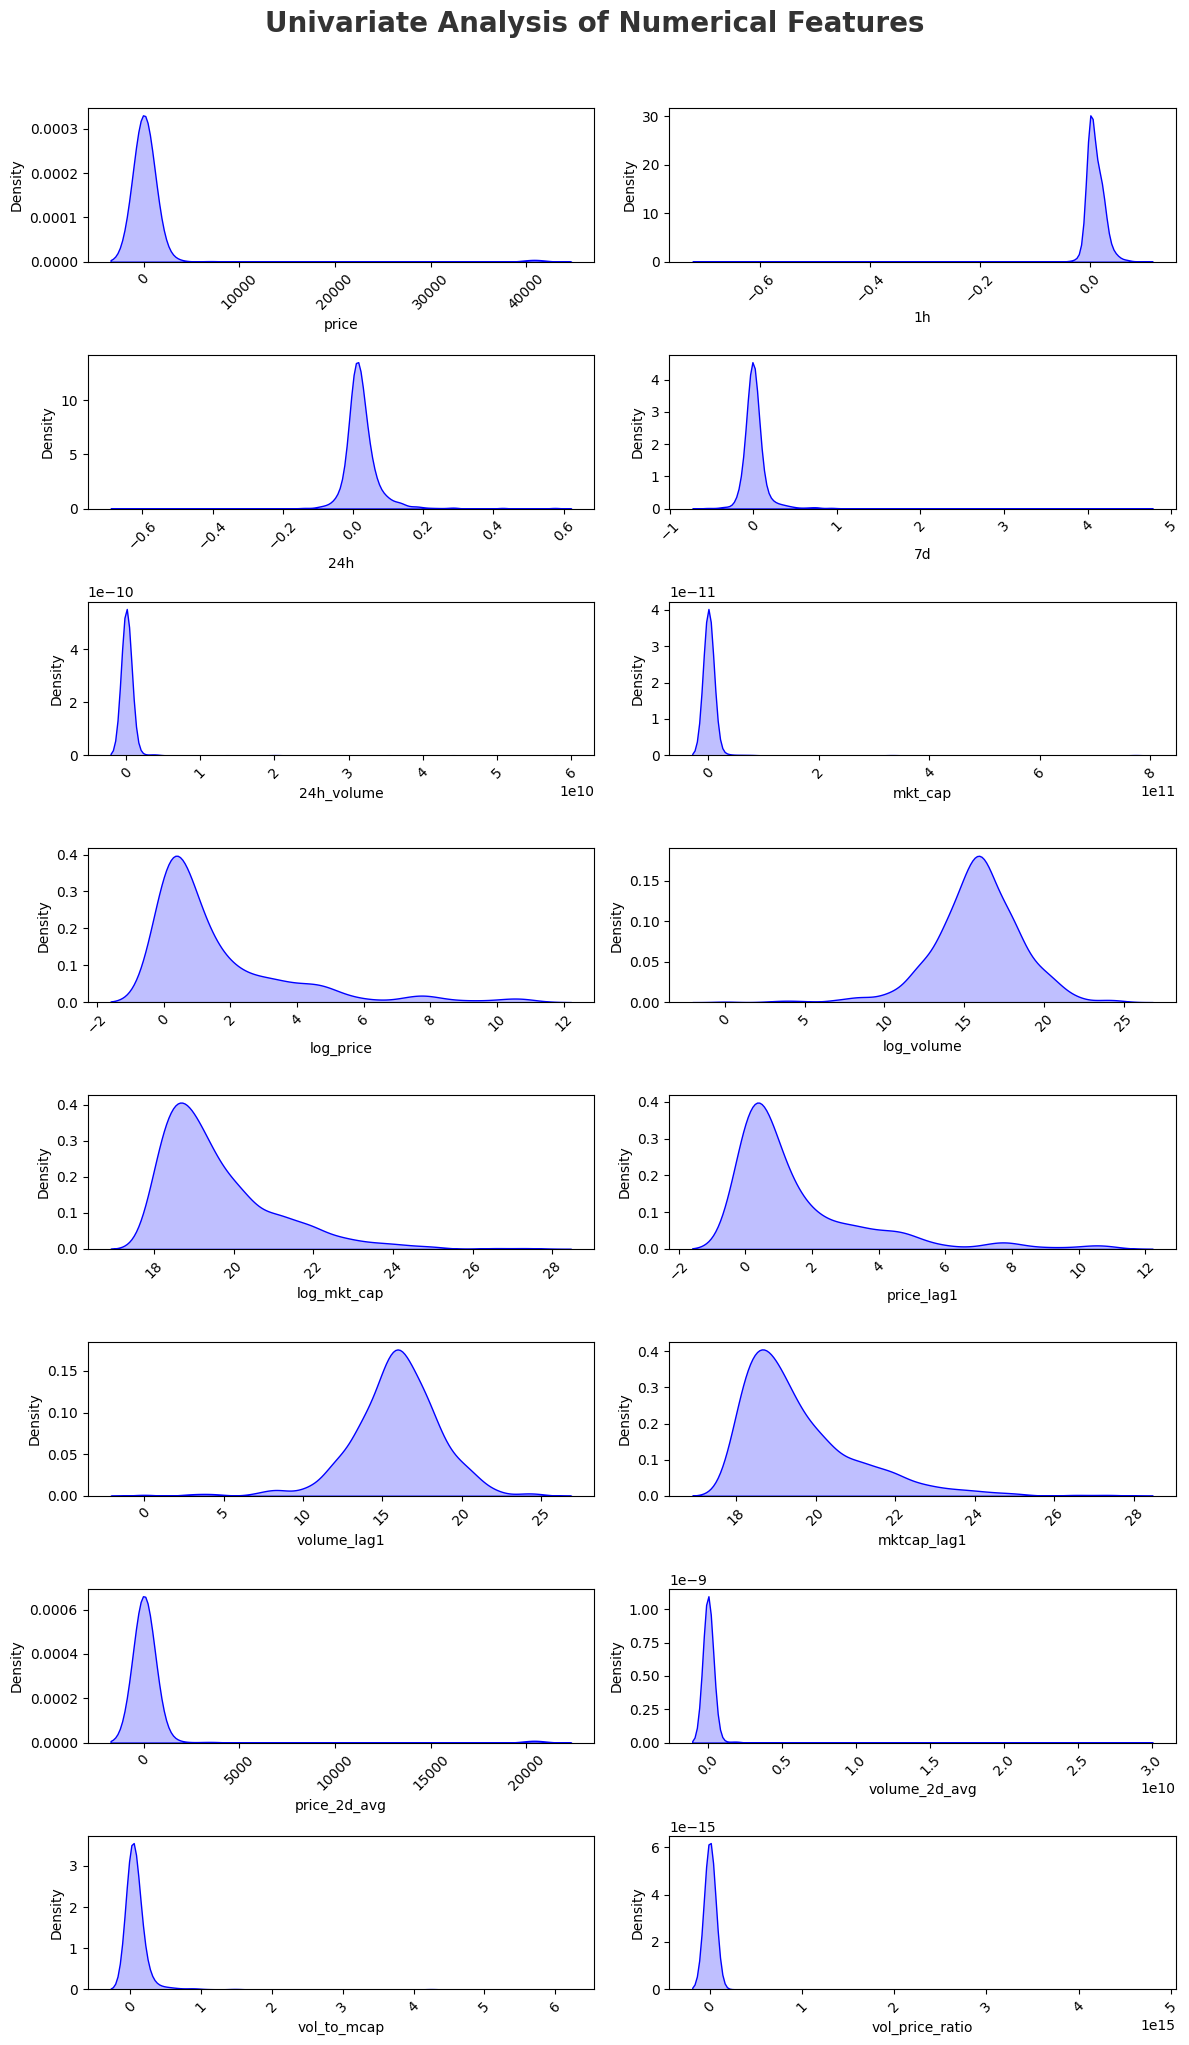

In [33]:
# Select only numerical columns, excluding object (categorical) and datetime types, and the 'liquidity_level' column
num_features = df.select_dtypes(exclude=['object', 'datetime64[ns]']).columns
num_features = num_features.drop('liquidity_level', errors='ignore') # Exclude the categorical 'liquidity_level' column

plt.figure(figsize=(12, 20))                                              # figure size length is 15, width is 12
plt.suptitle('Univariate Analysis of Numerical Features',                 # plot title
             fontsize=20,                                                 # fontsize value
             fontweight='bold',                                           # bloded font
             alpha=0.8,                                                   # alpha value 0.8 is the Slight transparency of the plot
             y=1.02)                                                      # y=1.02 is the distance between the title and the plot (vertical position)

for i in range(len(num_features)):                                        # Loops through each numerical feature in the list num_features
    plt.subplot((len(num_features) + 1) // 2, 2, i + 1)                   # grid of subplots 2 column and (number of features + 1) // 2 rows, and i +1 iteration
    sns.kdeplot(                                                          # kdeplot : kernel density estimation plot,
                data=df,                                                  # data is sources from dataframe df
                x=num_features[i],                                        # x-axis is taken for the numerical feature of each iteration (i)
                                                                          # y-axis is the density of the data
                fill=True,                                                # fill the area under the curve
                color='blue')                                             # color of the plot is blue
    plt.xlabel(num_features[i])                                           # x-axis label is the numerical feature of each iteration (i)
    plt.ylabel('Density')                                                 # y-axis label is density
    plt.xticks(rotation=45)                                               # x-axis ticks are rotated 45 degrees for better visibility

plt.tight_layout()                                                        # adjust the layout of the subplots to prevent overlap
plt.show()                                                                # show the plot

*Report of the univariate analytis for numerical features*
1. `Price`:
    - Highly right-skewed distribution (long tail to the right).
    - Majority of cryptocurrencies have low prices; very few have extremely high values (e.g., Bitcoin).
    - Suggests strong presence of outliers.

2. `1h`, `24h`, `7d` (Returns):
    - All three return features are centered around zero.
    - slightly more peaked than a normal (bell-shaped) distribution, indicating small short-term fluctuations.
    - No strong outliers — behavior is typical for short-term returns.

3. `24h_Volume` & `Market_Cap`:
    - Both are heavily skewed to the right.
    - Some cryptocurrencies dominate with extremely large volumes and market caps.
    - Indicates imbalance in trading activity and capitalization.

4. `Log Transformed Features` (`log_price`, `log_volume`, `log_mkt_cap`):
    - Distributions are more normalized and symmetric compared to raw values.
    - Log transformation was successful in handling skewness and making features more model-friendly.

5. `Lag Features` (`price_lag1`, `volume_lag1`, `mktcap_lag1`):
    - These distributions closely resemble their current values’ distributions.
    - Useful for capturing temporal dependencies or momentum patterns.
    - Still somewhat skewed — may benefit from additional smoothing or scaling.

6. `Rolling Average Features` (`price_2d_avg`, `volume_2d_avg`):
    - Distributions resemble the original/lagged versions but slightly smoothed.
    - Help capture short-term trends or momentum in the data.
    - Volume rolling still shows a heavy tail.

7. `Ratio Features` (`vol_to_mcap`, `vol_price_ratio`):
    - Highly skewed with sharp peaks near 0.
    - Most coins have a small volume relative to their market cap or price.
    - Could be useful indicators of liquidity efficiency or market interest.

```Note :```
- KDE plots (Kernel Density Estimation) are used for visualizing the distribution 
  of numerical (continuous) features. They provide a smooth curve that represents 
  the probability density function of the data.

- On the other hand, for categorical features, we use visualizations such as:
  - Bar plots or Count plots: To show the frequency of each category.
  - Histograms: Can also be used when the categories are ordinal or when 
    analyzing discrete numerical features.

### Catagorical Features

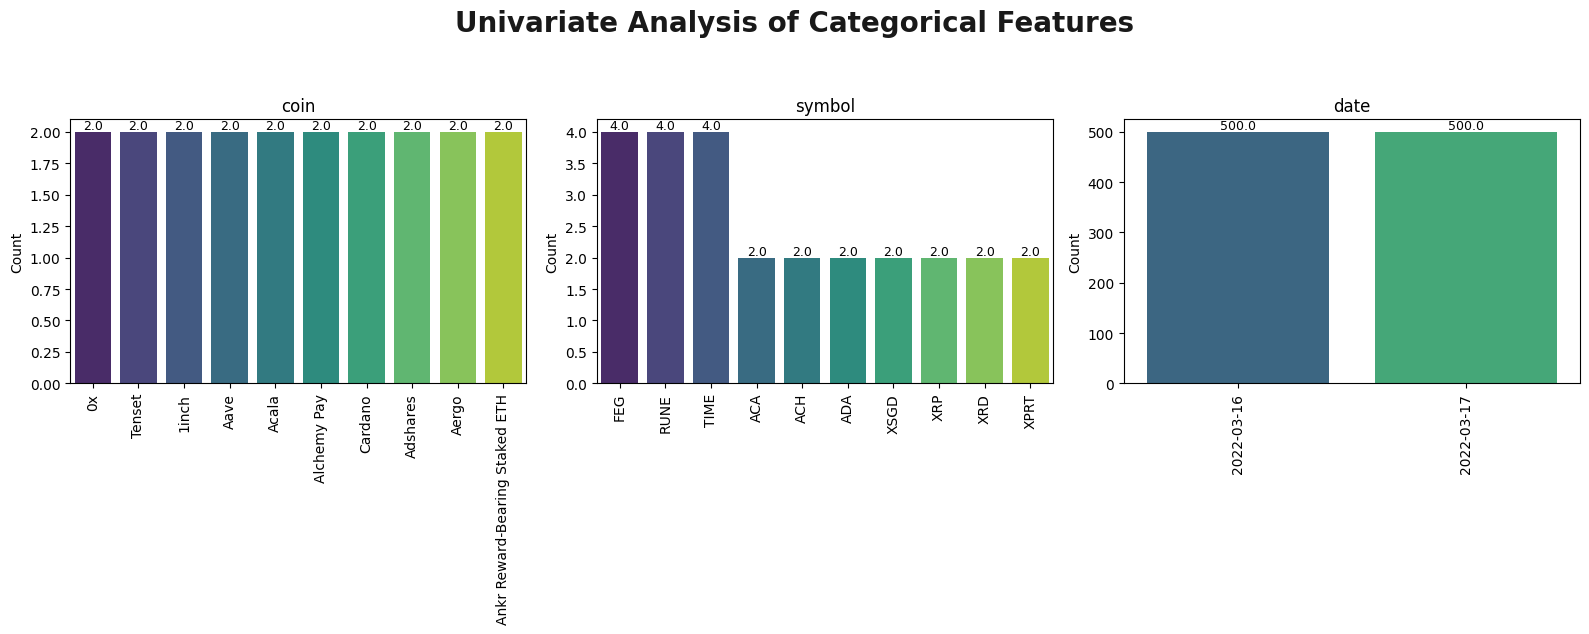

In [34]:
cat_features = df.select_dtypes(include=['object', 'datetime64[ns]']).columns

# Define number of top categories to show
top_n = 10

# Create plots
plt.figure(figsize=(16, 6))
plt.suptitle('Univariate Analysis of Categorical Features', 
             fontsize=20, 
             fontweight='bold', 
             alpha=0.9, 
             y=1.05)

for i, col in enumerate(cat_features):                              # Loops over each categorical feature and gets its index i and name col for subplot positioning
    plt.subplot(1, len(cat_features), i + 1)                        # 1 row
                                                                    # len(cat_features) columns
                                                                    # Current subplot at position i + 1

    # Get top N categories
    top_categories = df[col].value_counts().nlargest(top_n).index    # counts frequency of each category, picks the top 10 categories (most frequent).
    filtered = df[df[col].isin(top_categories)]                      # Filters the DataFrame to only keep rows where the column value is one of the top 10 — avoids clutter.

    ax = sns.countplot(x=filtered[col], order=top_categories, palette='viridis') 
    plt.xticks(rotation=90)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

    # Annotate counts
    for p in ax.patches:                                               # Iterates through each bar (p) in the chart.
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', rotation=0)

plt.tight_layout()
plt.show()
# plt.savefig('./images/Univariate_Cat.png')

*Report of the univariate analytis for Catagorical features*

1. Feature: `coin`:

    * Observation:
        - The coin feature has a large number of unique categories.
        - Most coins appear only once or twice, suggesting high cardinality.

    * Insight:
        - This feature may not be useful directly for prediction.

2. Feature: `symbol`:

    * Observation:
        - Like coin, symbol also shows many unique values, each with low counts.
        - Frequency distribution is very low, not much spread out.

    * Insight:
        - Similar to coin, may not add much predictive value in raw form.

3. Feature: `date`:

    * Observation:
        - The dataset contains two dates (2022-03-16 and 2022-03-17).
        - Both have a relatively equal count of entries.

    * Insight:
        - Since it's only 2 days, date won't add much variance for learning.


## Bivariate Analysis
**Relationship between two variables**

In [35]:
num_features

Index(['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'log_price',
       'log_volume', 'log_mkt_cap', 'price_lag1', 'volume_lag1', 'mktcap_lag1',
       'price_2d_avg', 'volume_2d_avg', 'vol_to_mcap', 'vol_price_ratio'],
      dtype='object')

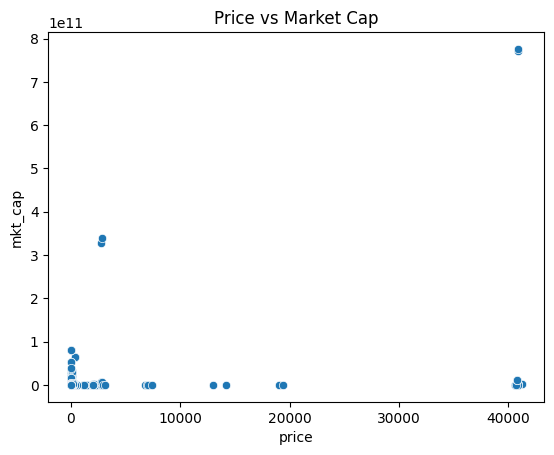

In [36]:
sns.scatterplot(x='price', y='mkt_cap', data=df)
plt.title('Price vs Market Cap')
plt.show()

*REPORTS*
- in the plot bottom-left corner, majority of cryptocurrencies are falling between 0 to 50000 price values with market cap between 0 to 1.
- here's a single dot way up in the top-right. representing an outlier the price value of 40,000 and a very high total value of market cap arround 8

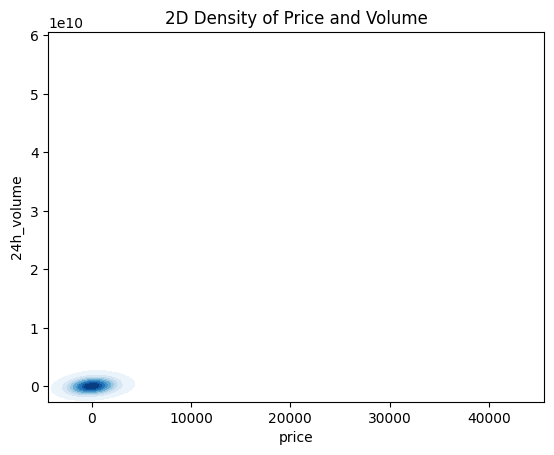

In [37]:
sns.kdeplot(data=df, x='price', y='24h_volume', fill=True, cmap='Blues')
plt.title("2D Density of Price and Volume")
plt.show()

*REPORTS*
- Most data is clustered low near to 0.
- Low Price, Low Volume is common here.
- Spread is limited

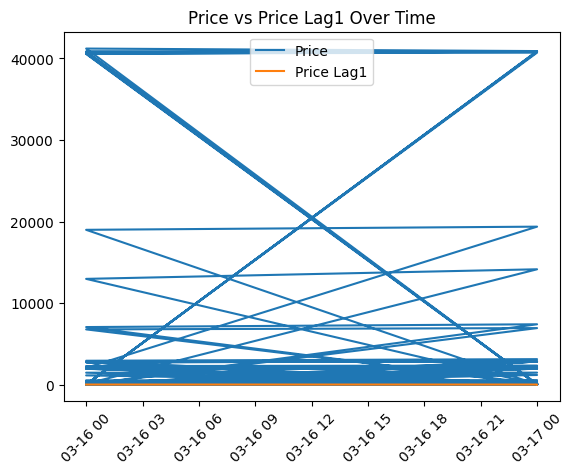

In [38]:
plt.plot(df['date'], df['price'], label='Price')
plt.plot(df['date'], df['price_lag1'], label='Price Lag1')
plt.legend()
plt.title('Price vs Price Lag1 Over Time')
plt.xticks(rotation=45)
plt.show()

*REPORTS*
- "Price" shows a clear upward trend
- "Price Lag1" is mostly flat and low
- Initial large jump in "Price".
- "Price Lag1" almost always lower than "Price"

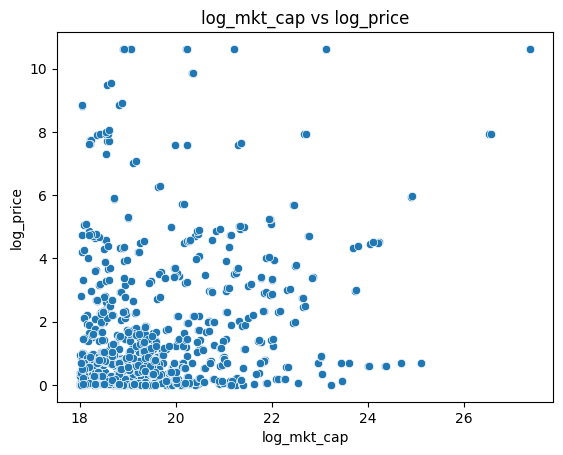

In [39]:
# Scatter plot example
sns.scatterplot(x='log_mkt_cap', y='log_price', data=df)
plt.title("log_mkt_cap vs log_price")
plt.show()

*REPORTS*
- Positive Relationship ('log_mkt_cap' increases, 'log_price' also tends to increase)
- A large cluster of data points is visible at the lower end of both 'log_mkt_cap' (around 18-20) and 'log_price' (around 0-3). 
- This indicates that many items have relatively small market caps and low prices (in their log-transformed scale).
- As 'log_mkt_cap' gets higher, the 'log_price' values become more spread out. For example, at log_mkt_cap around 22-24, there's a wider range of log_price values compared to when log_mkt_cap is around 18-19.
- High Outliers Values.
- While there's a positive trend, the data points don't fall perfectly on a single line, suggesting the relationship is not perfectly linear.

## Multivariate Analysis

*Report of the Multivariate analytis for numerical features*

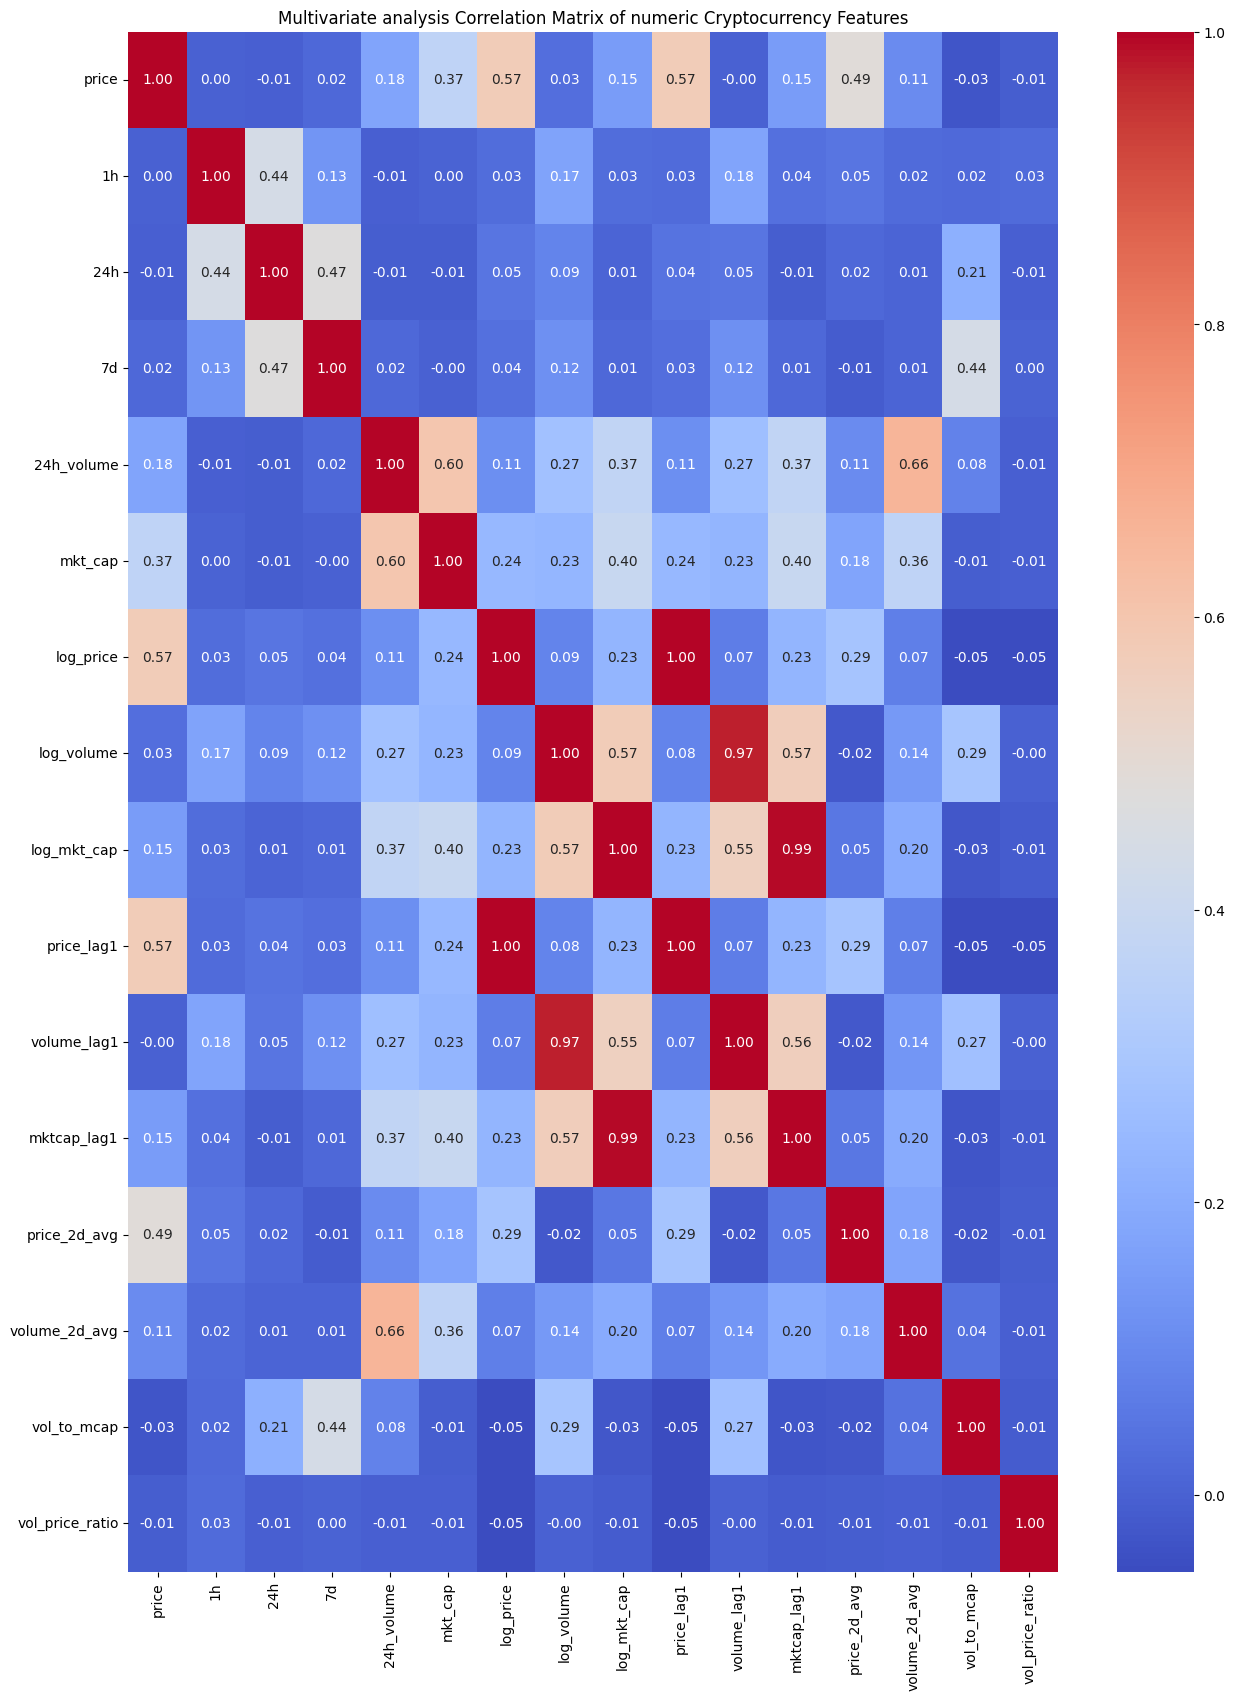

In [40]:
corr = df[num_features].corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Multivariate analysis Correlation Matrix of numeric Cryptocurrency Features')
plt.show()

*Report of the Multivariate analytis for catagorical features*

It displays the correlation coefficients between multiple variables. The values range from -1 to 1
 -------------------------------------------------------------------------------------------
- 1 means a perfect positive relationship (as one goes up, the other goes up perfectly).
- -1 means a perfect negative relationship (as one goes up, the other goes down perfectly).
- 0 means no linear relationship.
- The diagonal is always 1 because a variable is perfectly correlated with itself.
 --------------------------------------------------------------------------------------------

**Strong Positive Correlations (Red/Orange cells, values close to 1):**

- `Log Price`, `Log Market Cap`, and `Price`: 
    - These variables are highly correlated with each other, especially `log_price` with price `(0.97)`, and `log_price` with `log_mkt_cap` `(0.99)`. 
    - This is expected as they are fundamentally linked (e.g., market cap is often price times supply).
- `Lagged Variables` with `Current Variables`: 
    - `price_lag1` (previous day price) is highly correlated with `price` (current day) `(0.93)` and `log_price` `(0.99)`. 
    - Similarly, `volume_lag1` with `volume` `(0.97)` and `mktcap_lag1` with `mkt_cap` `(0.99)`. 
    - This makes sense; today's price is often very similar to yesterday's price.
- `Volume-Related`: 
    - `24h_volume` is strongly correlated with `volume_lag1` `(0.97)` and `log_volume` `(0.97)`.
- `Price` and `Market Cap over time`: 
    - `price_2d_avg` (2-day average price) is strongly correlated with `price` `(0.99)` and `log_price` `(1.00)`. 
    - Similarly, `volume_2d_avg` with `24h_volume` `(0.70)` and `log_volume` `(0.99)`.

**Strong Negative Correlations (Dark Blue cells, values close to -1):**

- There are no strong negative correlations evident in this matrix (no values close to -1). 
- The lowest values are around -0.04, which is very weak.

**Weak/No Correlations (Light Blue/Gray cells, values close to 0):**

- Time-based performance `(1h, 24h, 7d)` often has weak correlations with other features. 
- For example, `1h` (1-hour percentage change) has very low correlations with `price`, `mkt_cap`, `24h_volume`, etc., usually below 0.1. 
- This suggests that short-term price movements are largely independent of the absolute `price`, `market cap`, or `volume` values at a given time.
- `vol_to_mcap` (volume to market cap ratio) and `vol_price_ratio` (volume to price ratio) seem to have relatively weak correlations 
with most other features, except for each other (1.00 correlation). 
- This means they represent somewhat independent characteristics.

### Multicollinearity Check using Variance Inflation Factor (VIF)

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# If you haven't normalized yet, do it (optional but recommended for numeric stability)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[num_features])

# Create DataFrame again from scaled data
x_scaled_df = pd.DataFrame(x_scaled, columns=num_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled_df.values, i) for i in range(x_scaled_df.shape[1])]

print(vif_data)

            Feature          VIF
0             price     2.037682
1                1h     1.360229
2               24h     1.814784
3                7d     1.574054
4        24h_volume     2.530570
5           mkt_cap     1.856987
6         log_price  4074.369435
7        log_volume    26.859718
8       log_mkt_cap   106.943512
9        price_lag1  4074.017194
10      volume_lag1    25.901820
11      mktcap_lag1   105.604928
12     price_2d_avg     1.373981
13    volume_2d_avg     1.825780
14      vol_to_mcap     1.464121
15  vol_price_ratio     1.004634


## Feature Extraction

The reason behind dropping the features in this feature extraction step is *to remove non-informative or redundant columns* that are *not useful for predictive modeling* and to retain only the *engineered and relevant numerical features* that contribute directly to the model's performance.

---

### ✅ *Detailed Reasons for Dropping the Listed Columns:*

1. *'coin', 'symbol'*:

   * These are *categorical identifiers* and *do not hold any predictive numerical value*.
   * Including them may cause *data leakage* or introduce *noise*, especially if not encoded meaningfully.

2. *'date'*:

   * A raw date string is not directly usable in most machine learning models.
   * Any useful temporal information has already been captured in lag or rolling features (e.g., price_lag1, volume_2d_avg), so the raw date is no longer required.

3. *'price', '24h_volume', 'mkt_cap'*:

   * These are *raw numerical values, but they are typically **highly skewed*.
   * Instead, *log-transformed versions* (log_price, log_volume, log_mkt_cap) are retained for better scaling, reduced skewness, and improved model learning.

4. *'log_price', 'log_volume', 'log_mkt_cap'*:

   * Even though these are transformed features, they may be dropped if their *lag/rolling counterparts* (e.g., price_lag1, price_2d_avg) already represent similar information with added temporal context.
   * Or they may be dropped to avoid *multicollinearity* with their lagged versions.

---

### ✅ *What’s Retained (not dropped):*

The remaining features in final_df after dropping the above are:

* *Return-based Features*: '1h', '24h', '7d'
* *Lag Features*: 'price_lag1', 'volume_lag1', 'mktcap_lag1'
* *Rolling Averages*: 'price_2d_avg', 'volume_2d_avg'
* *Ratios*: 'vol_to_mcap', 'vol_price_ratio'

These are engineered features that:

* Capture *price momentum* and *volatility*
* Help model *liquidity dynamics*
* Reduce *noise* and *redundancy* from raw data

---

### ✅ *Conclusion*:

This step ensures the final dataset is:

* *Numerically clean*
* *Rich in temporal and liquidity-relevant features*
* *Optimized for training ML models* by removing unhelpful or redundant data.

In [42]:
final_df = df.copy()

# Separate features (X) and target variable (y)
# Drop all features intended for extraction and keep the target variable 'liquidity_level' as y
extract_features = ['coin','price', '24h_volume', 'mkt_cap', 'log_price',  'log_mkt_cap','date', 'symbol', 'liquidity_level']

# Create X by dropping all columns in extract_features_for_X
x = final_df.drop(columns=extract_features, inplace=False) # Set inplace=False to return a new DataFrame

# Create y with the target variable
y = final_df['liquidity_level']

In [43]:
from sklearn.preprocessing import StandardScaler

# Scale the features (X) only
scaler = StandardScaler()
final_x_scaled = scaler.fit_transform(x.values)

# Create DataFrame again from scaled data
final_x_scaled_df = pd.DataFrame(final_x_scaled, columns=x.columns)

# Calculate VIF for each feature on the scaled feature data
final_vif_data = pd.DataFrame()
final_vif_data["Feature"] = final_x_scaled_df.columns
# Use the values from the scaled feature DataFrame (final_x_scaled_df)
final_vif_data["VIF"] = [variance_inflation_factor(final_x_scaled_df.values, i) for i in range(final_x_scaled_df.shape[1])]

print(final_vif_data)

# Now you have X_scaled (final_x_scaled_df) and y, ready for model training.

            Feature        VIF
0                1h   1.326204
1               24h   1.659766
2                7d   1.559597
3        log_volume  20.029424
4        price_lag1   1.166063
5       volume_lag1  19.525113
6       mktcap_lag1   1.696773
7      price_2d_avg   1.130169
8     volume_2d_avg   1.075396
9       vol_to_mcap   1.444626
10  vol_price_ratio   1.004052


In [44]:
# Combine the scaled features with the target variable
final_df = final_x_scaled_df.copy()
final_df['liquidity_level'] = y.values  # Ensure the index aligns correctly

# Display the sample 10 resulting DataFrame
final_df.sample(10)

,1h,24h,7d,log_volume,price_lag1,volume_lag1,mktcap_lag1,price_2d_avg,volume_2d_avg,vol_to_mcap,vol_price_ratio,liquidity_level
674,-0.361449,0.073084,0.002772,0.295021,-0.146245,0.399407,-0.650959,-0.142531,-0.104242,0.065639,-0.067032,medium
46,1.875009,1.088848,-0.889012,0.980514,-0.078099,0.935884,0.623860,-0.142178,-0.064846,0.080925,-0.067032,high
728,-0.137803,1.562872,1.926227,1.449963,0.246939,-0.512340,-0.709263,-0.142149,-0.104242,0.149472,-0.067032,high
91,0.607683,-0.045422,-0.272632,0.128769,-0.745644,0.112925,0.226493,-0.132007,-0.017260,-0.219011,14.763664,medium
585,-0.361449,-0.553304,-0.259518,-0.247817,0.849556,-0.139040,-0.462642,-0.141620,-0.104242,-0.219767,-0.067032,medium
864,-0.137803,-0.451727,-0.023457,0.218842,-0.741935,0.199953,-1.076033,0.535398,-0.093872,0.264999,-0.067025,medium
730,0.644957,0.310096,-0.075915,0.349476,-0.721749,0.326172,0.345740,-0.141338,-0.096353,-0.184876,-0.067030,medium
180,0.607683,0.005367,-0.014714,0.986908,-0.660081,0.942062,0.803626,-0.142950,-0.064397,0.001891,-0.067030,high
21,-0.398723,-0.654880,-0.456235,-0.671995,-0.707422,-0.779434,-1.017362,-0.143051,-0.104242,-0.238248,-0.067032,low
927,-0.249626,-0.570233,-0.233289,-0.574235,0.824887,-0.238874,-1.045539,-0.141643,-0.104242,-0.222161,-0.067032,low


In [45]:
# As of tnow we have done the EDA and Feature Engineering on the dataset. and the dataset is ready for the model building.
# process the final_df fro operate the further model building step in file 'ml_pipeline_2.ipynb'.

final_df.to_csv('final_df.csv', index=False) # save the final dataset in to a csv file